In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#선형회귀모델 위한 패키지
from sklearn.linear_model import LinearRegression

#학습 및 테스트 데이터셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


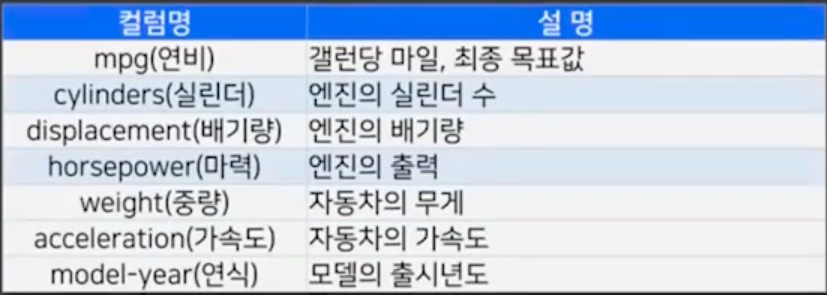

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [5]:
df=df.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


종속변수에 대한 상관관계

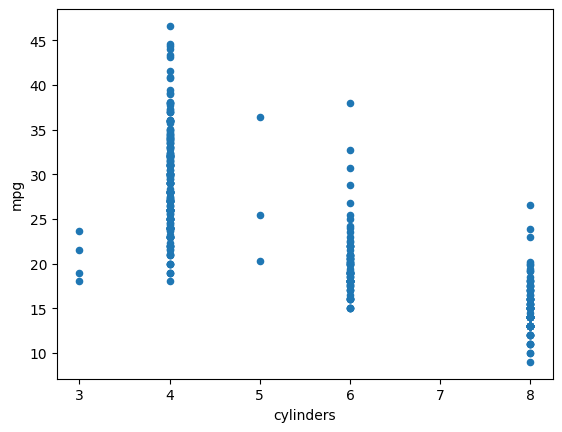

In [7]:
df.plot(kind='scatter',x='cylinders',y='mpg')
plt.show()

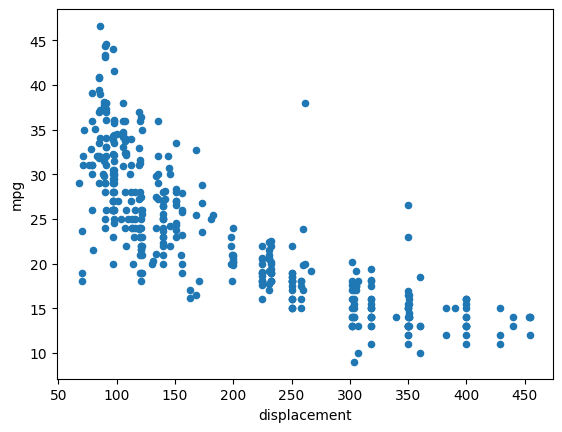

In [8]:
df.plot(kind='scatter',x='displacement',y='mpg')
plt.show()

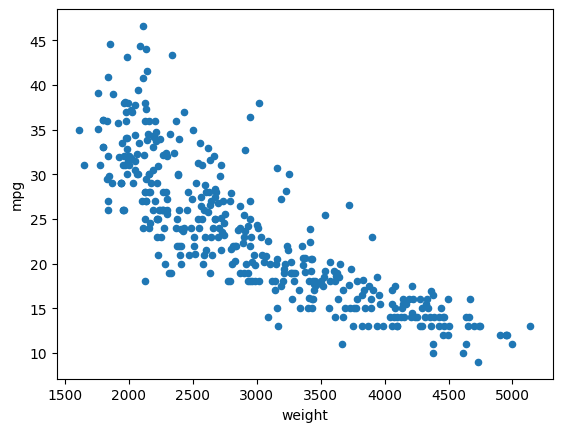

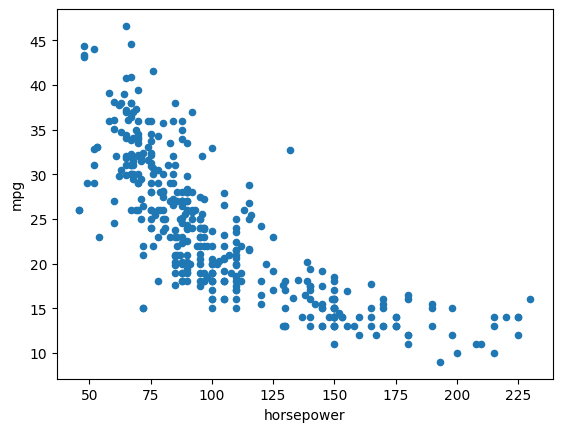

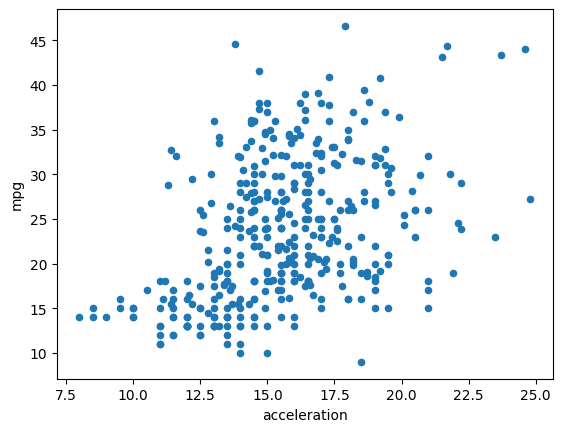

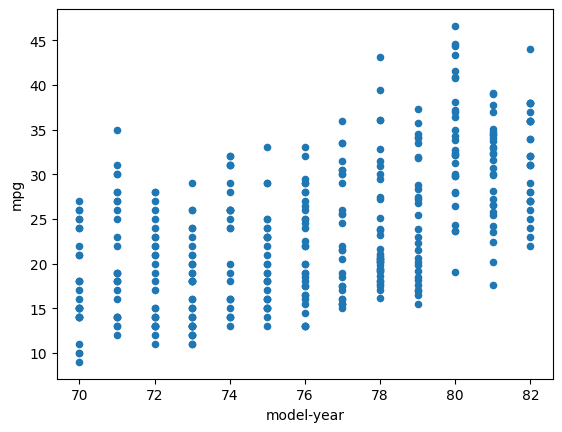

In [10]:
df.plot(kind='scatter',x='weight',y='mpg')
plt.show()
df.plot(kind='scatter',x='horsepower',y='mpg')
plt.show()
df.plot(kind='scatter',x='acceleration',y='mpg')
plt.show()
df.plot(kind='scatter',x='model-year',y='mpg')
plt.show()

In [11]:
X=df[['weight','horsepower','displacement']]   #다중선형회귀: 독립변수 2개 이상
y=df['mpg']  #종속변수

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 3)
(80, 3)
(316,)
(80,)


#데이터 분석

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print("기울기 a:",model.coef_)
print("y절편 b:", model.intercept_)

기울기 a: [-0.00517295 -0.0388781  -0.00934757]
y절편 b: 44.81484000500589


In [17]:
pred=model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print("결정계수:",score)

결정계수: 0.7060336075788368


In [22]:
pred=model.predict([[1000,153,361]])
print(pred)

[30.31906461]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 다중선형회귀분석


In [23]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


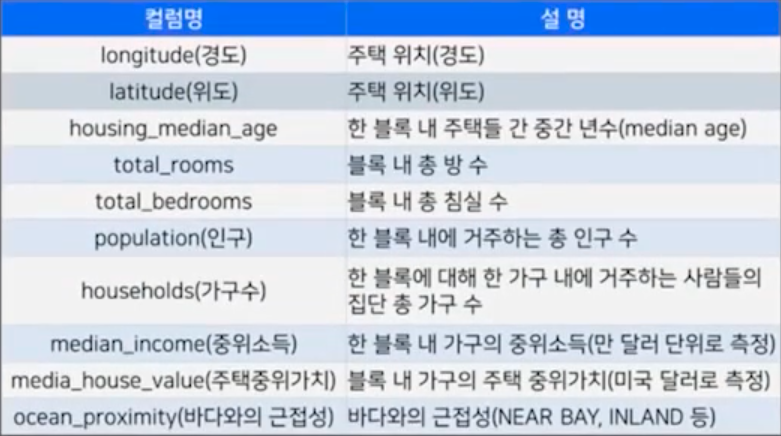

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
df=df.dropna(axis=0)

In [28]:
df=df.drop("ocean_proximity",axis=1)  #범주형은 레이블인코딩을 하거나 불필요시 삭제할 수 있다
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


# 상관관계 분석
- 두 변수간에 어떤 선형적 관계를 갖고 있는지 분석
- 0.7넘으면 강한 양의 상관관계, -0.7이하는 강한 음의 상관관계
- 0에 가까울수록 상관관계가 없음

In [30]:
corr=df.corr(method='pearson')
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

Text(0.5, 1.0, 'housing data correlation')

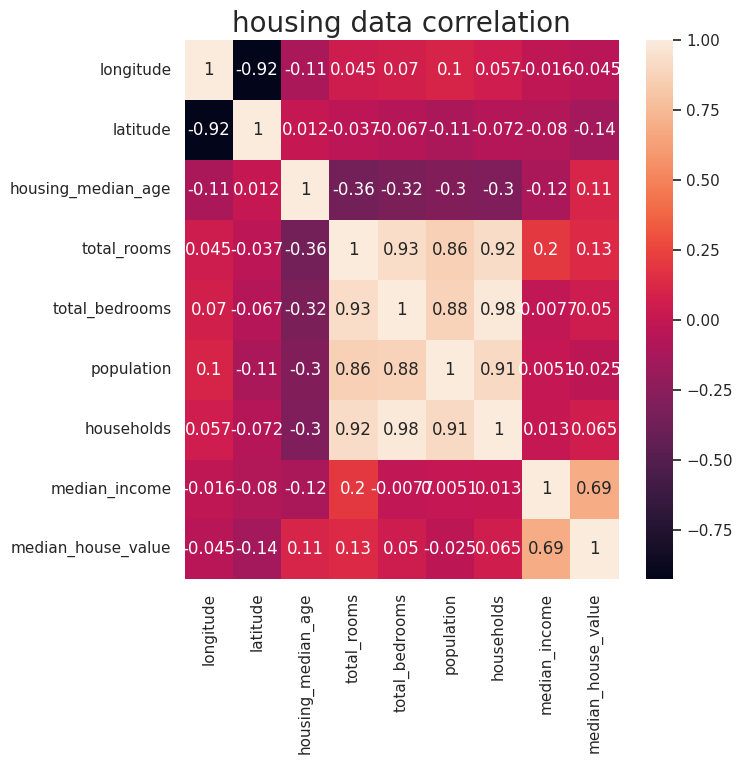

In [32]:
import seaborn as sns
sns.set(style='white')
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(corr,annot=True)
plt.title('housing data correlation', size=20)

In [33]:
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']

In [38]:
#데이터셋 분할(7:3)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
print("기울기 a", lr.coef_)
print("y절편 b", lr.intercept_)

기울기 a [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
y절편 b -3530241.307796566


In [48]:
pred=lr.predict(X_test)

# 그래프 이용 상관관계

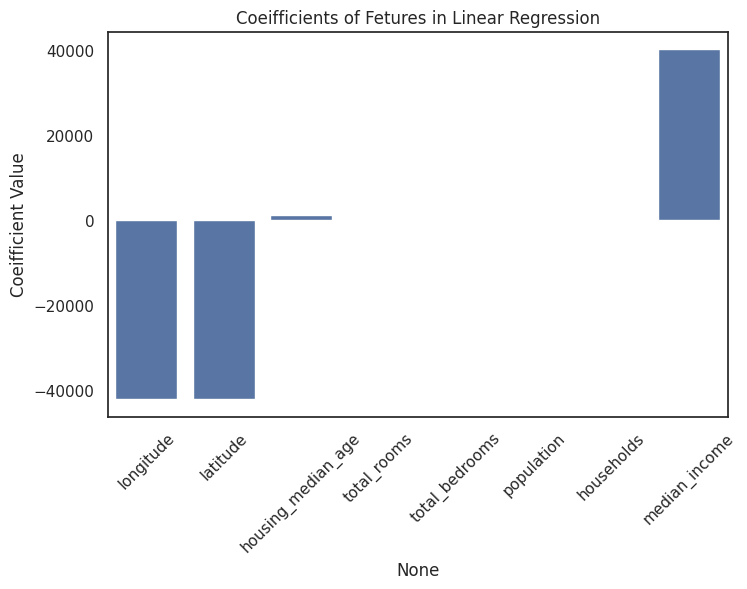

In [52]:
# 바 그래프
plt.figure(figsize=(8,5))
sns.barplot(x=X.columns, y=lr.coef_)
plt.title('Coeifficients of Fetures in Linear Regression')
plt.ylabel('Coeifficient Value')
plt.xticks(rotation=45)  #x축 레이블 45도 회전
plt.show()

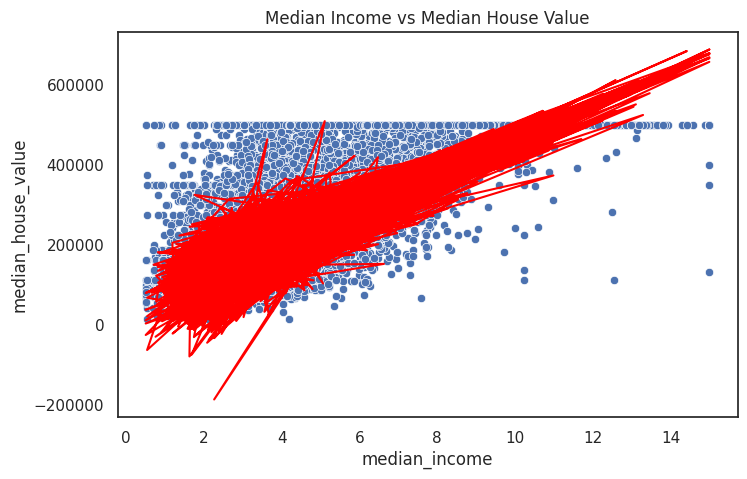

In [55]:
#산점도
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median Income vs Median House Value')
plt.plot(X_test['median_income'], lr.predict(X_test), color='red')
plt.show()

In [56]:
#쌍그림
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

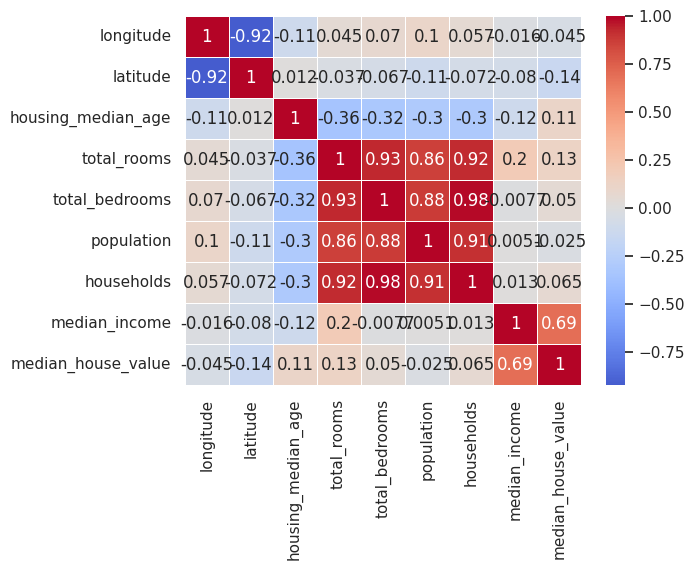

In [64]:
#상관행렬 히트맵
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# 스타일 설정
sns.set(style='whitegrid')
plt.show()

성능평가

In [65]:
from sklearn.metrics import r2_score   #결정계수(회귀모델 성능 척도)
score=r2_score(y_test,pred)
print(score)

0.6445130291082337
